# 01 - Estatística Descritiva - Gabarito

Nessa aula, iremos tratar dos seguintes conteúdos:
- Introdução
- Tipos de Variáveis
- Estatística Descritiva
- Métricas de Posição
- Boxplot
- Outliers
- Métricas de Dispersão
- Correlação
- Assimetria
- Tabela de Frequências

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIqUDdVObHKev_QuHhakpATphyz6L62qflwl3vn79djOLS07sc4sbSot6M2oO_DR5tnycZygSagBuB6g&usqp=CAU" width = 800>

## 

## Exercícios

__1)__ Façam a análise exploratória sobre a base de dados _mpg_, levante eventuais _outliers_, olhe para a consistência de dados e crie visualizações que achar necessárias.<br><br>

In [1]:
# Import das Principais Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg = sns.load_dataset('mpg')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.shape

(398, 9)

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
(mpg.isna().sum()/mpg.shape[0])*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [6]:
mpg[mpg['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [7]:
mpg.dropna(axis = 0, inplace = True)

In [8]:
mpg.shape

(392, 9)

In [9]:
mpg[mpg['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [10]:
mpg['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [11]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


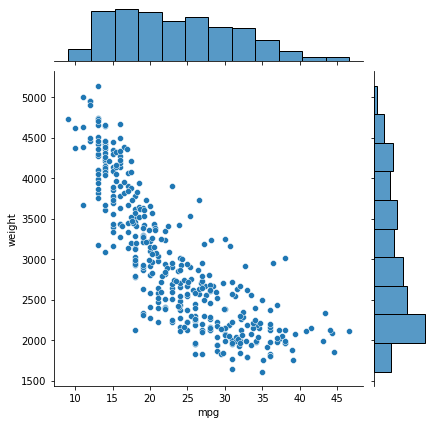

In [12]:
sns.jointplot(data = mpg, 
              x = "mpg", 
              y="weight")

plt.show()

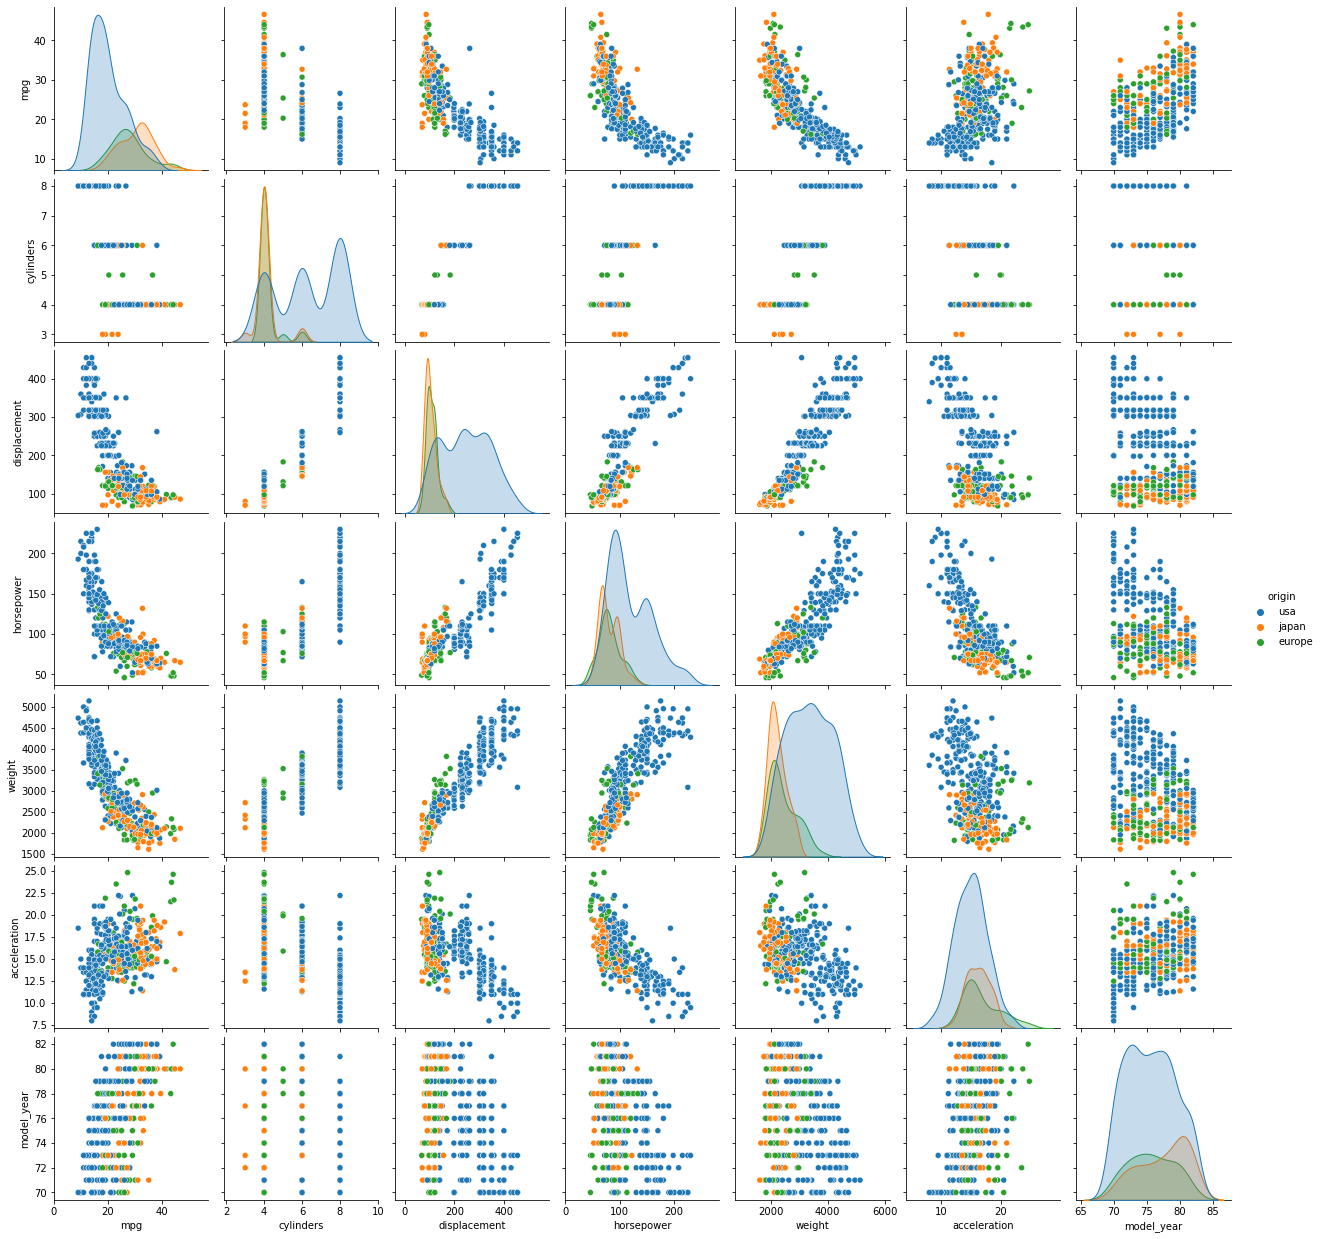

In [13]:
sns.pairplot(mpg, hue='origin')

plt.show()

In [14]:
# Avaliando a Correlação
corr = mpg.corr()

# Mostra a correlação
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


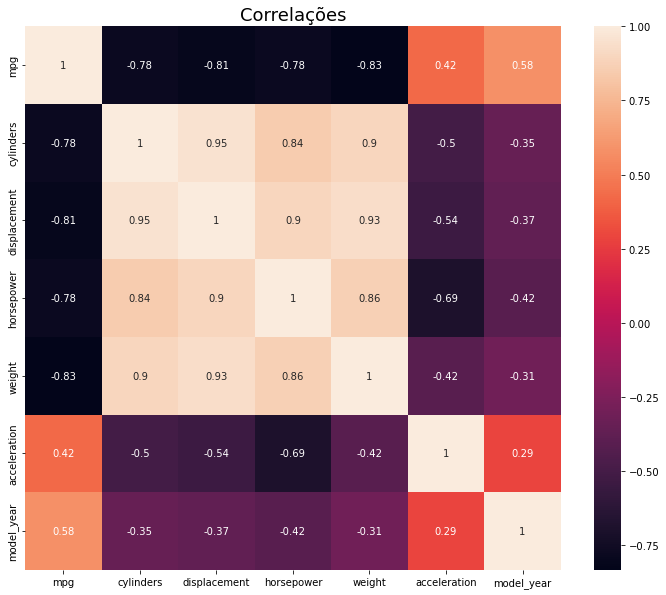

In [15]:
# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Define o Titulo
plt.title("Correlações", size=18)

# Mapa de Calor da Correlação
sns.heatmap(corr, annot = corr)

# Mostra o Gráfico
plt.show()

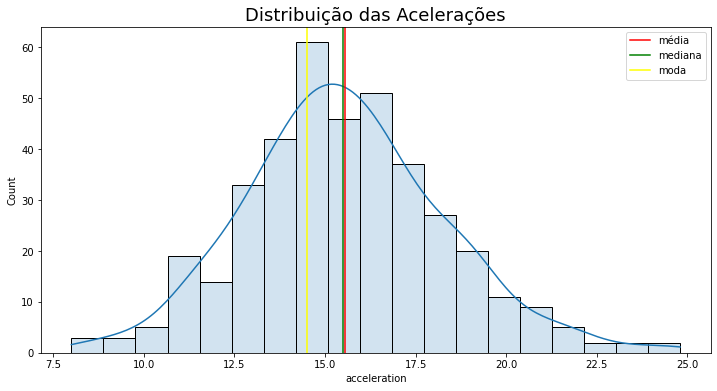

In [16]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição das Acelerações", size=18)

# Plot do Histograma
sns.histplot(mpg["acceleration"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=mpg["acceleration"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(mpg["acceleration"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(mpg["acceleration"].mode().shape[0]):
    plt.axvline(mpg["acceleration"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

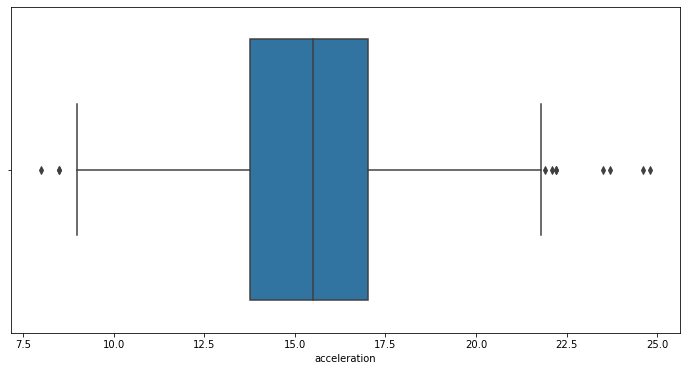

In [17]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = mpg, x = "acceleration")

plt.show()

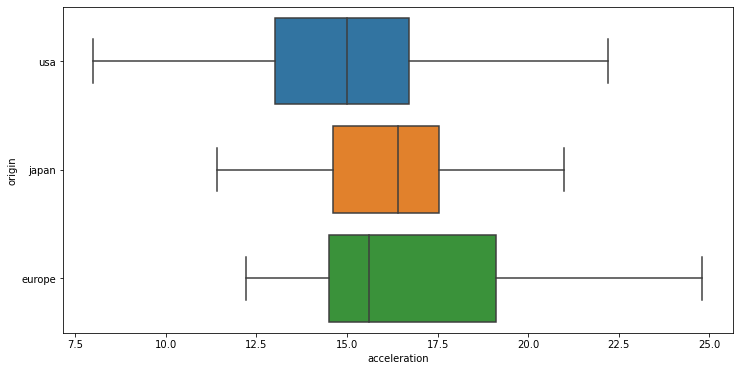

In [18]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = mpg, x = "acceleration", y = 'origin')

plt.show()

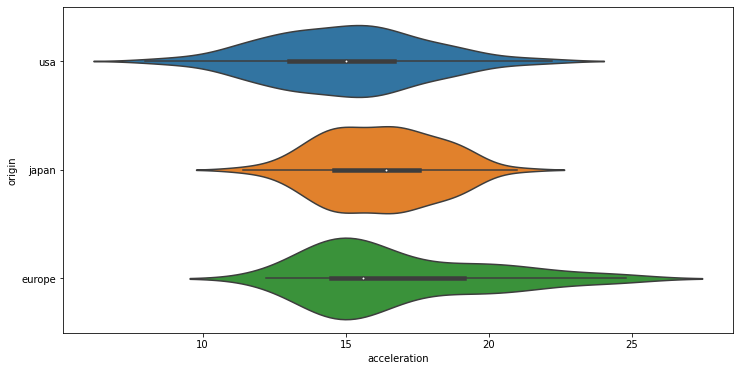

In [19]:
plt.figure(figsize=(12, 6))

sns.violinplot(data = mpg, x = "acceleration", y = 'origin')

plt.show()

In [20]:
acc_q1 = mpg['acceleration'].quantile(0.25)
acc_q3 = mpg['acceleration'].quantile(0.75)
iqr = acc_q3 - acc_q1
lim_inf = acc_q1 - 1.5*iqr
lim_sup = acc_q3 + 1.5*iqr

print('Avaliando os Outliers:')
print('Primeiro Quartil: ', acc_q1)
print('Terceiro Quartil: ', acc_q3)
print('IQR:              ', iqr)
print('Limite Inferior:  ', lim_inf)
print('Limite Superiro:  ', lim_sup)

Avaliando os Outliers:
Primeiro Quartil:  13.775
Terceiro Quartil:  17.025
IQR:               3.2499999999999982
Limite Inferior:   8.900000000000002
Limite Superiro:   21.899999999999995


In [21]:
outliers = mpg[(mpg['acceleration'] < lim_inf) | (mpg['acceleration'] > lim_sup)]

outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3
195,29.0,4,85.0,52.0,2035,22.2,76,usa,chevrolet chevette
196,24.5,4,98.0,60.0,2164,22.1,76,usa,chevrolet woody
209,19.0,4,120.0,88.0,3270,21.9,76,europe,peugeot 504
299,27.2,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


## 